In [129]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

import xgboost as xgb

## Read in Test data

In [67]:
test = pd.read_csv('test_merged.csv')

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_2155/3451487207.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('test_merged.csv')


In [68]:
test.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


## Split date into day, month and year variables

In [69]:
test['Date'].unique()

array(['17/09/2015', '16/09/2015', '15/09/2015', '14/09/2015',
       '13/09/2015', '12/09/2015', '11/09/2015', '10/09/2015',
       '09/09/2015', '08/09/2015', '07/09/2015', '06/09/2015',
       '05/09/2015', '04/09/2015', '03/09/2015', '02/09/2015',
       '01/09/2015', '31/08/2015', '30/08/2015', '29/08/2015',
       '28/08/2015', '27/08/2015', '26/08/2015', '25/08/2015',
       '24/08/2015', '23/08/2015', '22/08/2015', '21/08/2015',
       '20/08/2015', '19/08/2015', '18/08/2015', '17/08/2015',
       '16/08/2015', '15/08/2015', '14/08/2015', '13/08/2015',
       '12/08/2015', '11/08/2015', '10/08/2015', '09/08/2015',
       '08/08/2015', '07/08/2015', '06/08/2015', '05/08/2015',
       '04/08/2015', '03/08/2015', '02/08/2015', '01/08/2015'],
      dtype=object)

In [70]:
test['Date'].dtypes

dtype('O')

In [72]:
test['Date'] = pd.to_datetime(test['Date'], dayfirst=True)

In [73]:
test['Date'].dtypes

dtype('<M8[ns]')

In [74]:
# create seperate variables 
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day

In [75]:
test.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,0,1,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
1,1,3,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2,2,7,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
3,3,8,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
4,4,9,4,2015-09-17,NaN,NaN,1.0,1,0,0,...,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17


### Set date as index

In [76]:
test.set_index('Date', inplace=True)

In [77]:
test.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-17,0,1,4,NaN,NaN,1.0,1,0,0,c,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17
2015-09-17,1,3,4,NaN,NaN,1.0,1,0,0,a,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17
2015-09-17,2,7,4,NaN,NaN,1.0,1,0,0,a,...,24000.0,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17
2015-09-17,3,8,4,NaN,NaN,1.0,1,0,0,a,...,7520.0,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17
2015-09-17,4,9,4,NaN,NaN,1.0,1,0,0,a,...,2030.0,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17


## Test data cleaning

### Null values, drop closed store records and unused columns

In [78]:
test.isnull().sum()

Unnamed: 0                       0
Store                            0
DayOfWeek                        0
Sales                        41088
Customers                    41088
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
Year                             0
Month                            0
Day                              0
dtype: int64

In [79]:
test.loc[test['Open'].isnull()]

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,,
2015-09-17,479,622,4,NaN,NaN,NaN,1,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,17
2015-09-16,1335,622,3,NaN,NaN,NaN,1,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,16
2015-09-15,2191,622,2,NaN,NaN,NaN,1,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,15
2015-09-14,3047,622,1,NaN,NaN,NaN,1,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,14
2015-09-12,4759,622,6,NaN,NaN,NaN,0,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,12
2015-09-11,5615,622,5,NaN,NaN,NaN,0,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,11
2015-09-10,6471,622,4,NaN,NaN,NaN,0,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,10
2015-09-09,7327,622,3,NaN,NaN,NaN,0,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,9
2015-09-08,8183,622,2,NaN,NaN,NaN,0,0,0,a,...,NaN,NaN,NaN,0,NaN,NaN,NaN,2015,9,8


In [80]:
# all missing values are for store 622, which is open Mon-Sat unless its a stateholiday
test.loc[test['Open'].isnull()] = 1

In [81]:
# drop closed store records
test = test[test.Open == 1].copy()
test.nunique()

Unnamed: 0                   35093
Store                          856
DayOfWeek                        7
Sales                            1
Customers                        1
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        5
Assortment                       4
CompetitionDistance            555
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 21
Promo2SinceYear                  8
PromoInterval                    4
Year                             2
Month                            3
Day                             31
dtype: int64

In [82]:
test.isnull().sum()

Unnamed: 0                       0
Store                            0
DayOfWeek                        0
Sales                        35093
Customers                    35093
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance             65
CompetitionOpenSinceMonth    13003
CompetitionOpenSinceYear     13003
Promo2                           0
Promo2SinceWeek              14803
Promo2SinceYear              14803
PromoInterval                14803
Year                             0
Month                            0
Day                              0
dtype: int64

In [83]:
# check same number of stores without promo2 as missing promo start dates
test.loc[test['Promo2'] == 0].shape[0]

14803

In [84]:
# fill promo start dates with 0 as no promo
test['Promo2SinceWeek'] = test['Promo2SinceWeek'].fillna(0)
test['Promo2SinceYear'] = test['Promo2SinceYear'].fillna(0)
test['PromoInterval'] = test['PromoInterval'].fillna(0)

In [85]:
# fill missing competition distance with 0
test['CompetitionDistance'] = test['CompetitionDistance'].fillna(0)

In [86]:
test.isnull().sum()

Unnamed: 0                       0
Store                            0
DayOfWeek                        0
Sales                        35093
Customers                    35093
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth    13003
CompetitionOpenSinceYear     13003
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
Year                             0
Month                            0
Day                              0
dtype: int64

In [87]:
test = test.drop(test.columns[[0]], axis=1)

In [88]:
# drop unused columns
test = test.drop(columns = ['CompetitionOpenSinceMonth', 
                            'CompetitionOpenSinceYear', 
                            'PromoInterval', 
                            'Promo2SinceWeek', 
                            'Promo2SinceYear',
                            'Customers',
                            'Open'
                           ])

### Recode variables to match train dataset

In [100]:
test.loc[test['Assortment'] == 'a', 'Assortment'] = 1
test.loc[test['Assortment'] == 'b', 'Assortment'] = 2
test.loc[test['Assortment'] == 'c', 'Assortment'] = 3

In [101]:
test.loc[test['StateHoliday'] == '0', 'StateHoliday'] = 'nh'
test.loc[test['StateHoliday'] == '1', 'StateHoliday'] = 'a'

In [102]:
test.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day
Date,,,,,,,,,,,,,
2015-09-17,1,4,NaN,1,nh,0,c,1,1270.0,0,2015,9,17
2015-09-17,3,4,NaN,1,nh,0,a,1,14130.0,1,2015,9,17
2015-09-17,7,4,NaN,1,nh,0,a,3,24000.0,0,2015,9,17
2015-09-17,8,4,NaN,1,nh,0,a,1,7520.0,0,2015,9,17
2015-09-17,9,4,NaN,1,nh,0,a,3,2030.0,0,2015,9,17


## Set up Train and Test data (X_train, y_train, X_test)

In [103]:
train = pd.read_csv('train_for_test.csv')
train.set_index('Date', inplace=True)
train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2New
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,1,nh,1,c,1,1270,2015,7,31,0
2015-07-31,2,5,6064,1,nh,1,a,1,570,2015,7,31,1
2015-07-31,3,5,8314,1,nh,1,a,1,14130,2015,7,31,1
2015-07-31,4,5,13995,1,nh,1,c,3,620,2015,7,31,0
2015-07-31,5,5,4822,1,nh,1,a,1,29910,2015,7,31,0


In [104]:
train = train.rename(columns = {'Promo2New' : 'Promo2'})
train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,1,nh,1,c,1,1270,2015,7,31,0
2015-07-31,2,5,6064,1,nh,1,a,1,570,2015,7,31,1
2015-07-31,3,5,8314,1,nh,1,a,1,14130,2015,7,31,1
2015-07-31,4,5,13995,1,nh,1,c,3,620,2015,7,31,0
2015-07-31,5,5,4822,1,nh,1,a,1,29910,2015,7,31,0


In [105]:
X_train = train.drop(columns=['Sales'])
y_train = train['Sales']

In [106]:
X_test = test.drop(columns=['Sales'])

In [107]:
X_train.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2
Date,,,,,,,,,,,,
2015-07-31,1,5,1,nh,1,c,1,1270,2015,7,31,0
2015-07-31,2,5,1,nh,1,a,1,570,2015,7,31,1
2015-07-31,3,5,1,nh,1,a,1,14130,2015,7,31,1
2015-07-31,4,5,1,nh,1,c,3,620,2015,7,31,0
2015-07-31,5,5,1,nh,1,a,1,29910,2015,7,31,0


In [108]:
y_train.head()

Date
2015-07-31     5263
2015-07-31     6064
2015-07-31     8314
2015-07-31    13995
2015-07-31     4822
Name: Sales, dtype: int64

In [109]:
X_test.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day
Date,,,,,,,,,,,,
2015-09-17,1,4,1,nh,0,c,1,1270.0,0,2015,9,17
2015-09-17,3,4,1,nh,0,a,1,14130.0,1,2015,9,17
2015-09-17,7,4,1,nh,0,a,3,24000.0,0,2015,9,17
2015-09-17,8,4,1,nh,0,a,1,7520.0,0,2015,9,17
2015-09-17,9,4,1,nh,0,a,3,2030.0,0,2015,9,17


## Transformation

In [110]:
# transformer to covert categorical variables 
cat_transformer_onehot = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore', 
                                                                            sparse=False))])

# set order of values for ordinal variable
cat_transformer_ordinal = Pipeline(steps=[('encoder',
                                                  OrdinalEncoder(categories=[[1, 2, 3]]))])


# transformer to move towards normal distribution of numerical variables
num = Pipeline(steps=[('encoder', PowerTransformer())])    

In [111]:
# classify columns for transformation
preprocessor  = ColumnTransformer(remainder='passthrough', transformers = [
    ('cat', cat_transformer_onehot, 
     ['StateHoliday', 'StoreType']), 
    ('ordinal', cat_transformer_ordinal,
     ['Assortment']),
    ('num', num,
     ['CompetitionDistance'])
])

In [112]:
# transform the data
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])
# fit the transformer to X_train
pipe_fit = pipeline.fit(X_train)

X_train = pd.DataFrame(pipe_fit.transform(X_train), columns = pipe_fit.get_feature_names_out().tolist())
X_train.info()

/Users/gysd/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   cat__StateHoliday_a       844392 non-null  float64
 1   cat__StateHoliday_b       844392 non-null  float64
 2   cat__StateHoliday_c       844392 non-null  float64
 3   cat__StateHoliday_nh      844392 non-null  float64
 4   cat__StoreType_a          844392 non-null  float64
 5   cat__StoreType_b          844392 non-null  float64
 6   cat__StoreType_c          844392 non-null  float64
 7   cat__StoreType_d          844392 non-null  float64
 8   ordinal__Assortment       844392 non-null  float64
 9   num__CompetitionDistance  844392 non-null  float64
 10  remainder__Store          844392 non-null  float64
 11  remainder__DayOfWeek      844392 non-null  float64
 12  remainder__Promo          844392 non-null  float64
 13  remainder__SchoolHoliday  844392 non-null  f

In [113]:
X_test = pd.DataFrame(pipe_fit.transform(X_test), columns = pipe_fit.get_feature_names_out().tolist())
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35104 entries, 0 to 35103
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cat__StateHoliday_a       35104 non-null  float64
 1   cat__StateHoliday_b       35104 non-null  float64
 2   cat__StateHoliday_c       35104 non-null  float64
 3   cat__StateHoliday_nh      35104 non-null  float64
 4   cat__StoreType_a          35104 non-null  float64
 5   cat__StoreType_b          35104 non-null  float64
 6   cat__StoreType_c          35104 non-null  float64
 7   cat__StoreType_d          35104 non-null  float64
 8   ordinal__Assortment       35104 non-null  float64
 9   num__CompetitionDistance  35104 non-null  float64
 10  remainder__Store          35104 non-null  float64
 11  remainder__DayOfWeek      35104 non-null  float64
 12  remainder__Promo          35104 non-null  float64
 13  remainder__SchoolHoliday  35104 non-null  float64
 14  remain

## XGBoost Model

### Train the model

In [114]:
xgb_params = {'colsample_bytree': 0.8,
              'eta': 0.2,
              'gamma': 1,
              'max_depth': 10,
              'subsample': 0.6,
              "booster": "gbtree", 
              'objective':'reg:squarederror'
             }

In [115]:
XGB_model = xgb.XGBRegressor(random_state=42, **xgb_params)

In [116]:
XGB_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.2, eval_metric=None,
             feature_types=None, gamma=1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Predict sales for forecast period

In [117]:
XGB_predictions = XGB_model.predict(X_test)
XGB_predictions

array([ 4381.8413,  7668.376 ,  8887.028 , ...,  5663.106 , 22787.117 ,
        6552.619 ], dtype=float32)

In [118]:
XGB_df = pd.DataFrame({'Predicted Sales' : XGB_predictions})

In [119]:
XGB_df

,Predicted Sales
0,4381.841309
1,7668.375977
2,8887.028320
3,6396.290527
4,7333.931641
...,...
35099,2116.598145
35100,6697.014648
35101,5663.105957
35102,22787.117188


In [120]:
test.shape

(35104, 13)

In [121]:
#XGB_df.to_csv('XGB_df.csv')

In [122]:
XGB_df = XGB_df.set_index(test.index)
XGB_df

,Predicted Sales
Date,
2015-09-17,4381.841309
2015-09-17,7668.375977
2015-09-17,8887.028320
2015-09-17,6396.290527
2015-09-17,7333.931641
...,...
2015-08-01,2116.598145
2015-08-01,6697.014648
2015-08-01,5663.105957


### Plot predictions

In [126]:
mean_test_sales = XGB_df.groupby(XGB_df.index).mean()

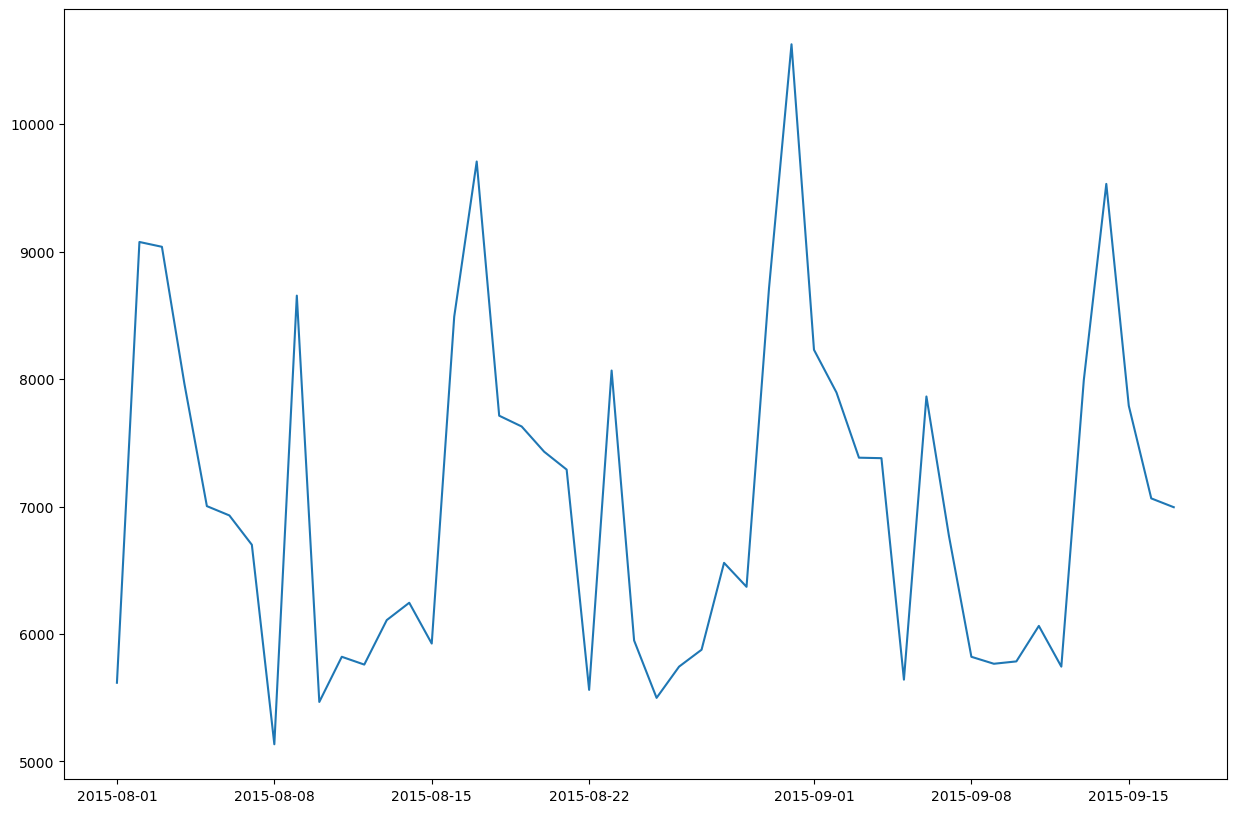

In [153]:
plt.figure(figsize=(15,10))
plt.plot(mean_test_sales.index, mean_test_sales['Predicted Sales'])

### Plot actual sales and forecast sales

In [124]:
test['Predicted Sales'] = XGB_df['Predicted Sales']

In [132]:
test.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,Day,Predicted Sales
Date,,,,,,,,,,,,,,
2015-09-17,1,4,NaN,1,nh,0,c,1,1270.0,0,2015,9,17,4381.841309
2015-09-17,3,4,NaN,1,nh,0,a,1,14130.0,1,2015,9,17,7668.375977
2015-09-17,7,4,NaN,1,nh,0,a,3,24000.0,0,2015,9,17,8887.028320
2015-09-17,8,4,NaN,1,nh,0,a,1,7520.0,0,2015,9,17,6396.290527
2015-09-17,9,4,NaN,1,nh,0,a,3,2030.0,0,2015,9,17,7333.931641


In [133]:
train['Predicted Sales'] = np.nan

In [134]:
train.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2,Predicted Sales
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263,1,nh,1,c,1,1270,2015,7,31,0,NaN
2015-07-31,2,5,6064,1,nh,1,a,1,570,2015,7,31,1,NaN
2015-07-31,3,5,8314,1,nh,1,a,1,14130,2015,7,31,1,NaN
2015-07-31,4,5,13995,1,nh,1,c,3,620,2015,7,31,0,NaN
2015-07-31,5,5,4822,1,nh,1,a,1,29910,2015,7,31,0,NaN


In [135]:
all_time = pd.concat([train, test], axis=0)

/var/folders/fp/_jk7rzqj00756q1bhvwhswcw0000gp/T/ipykernel_2155/893699288.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_time = pd.concat([train, test], axis=0)


In [136]:
all_time

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2,Predicted Sales
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,1,nh,1,c,1,1270.0,2015,7,31,0,NaN
2015-07-31,2,5,6064.0,1,nh,1,a,1,570.0,2015,7,31,1,NaN
2015-07-31,3,5,8314.0,1,nh,1,a,1,14130.0,2015,7,31,1,NaN
2015-07-31,4,5,13995.0,1,nh,1,c,3,620.0,2015,7,31,0,NaN
2015-07-31,5,5,4822.0,1,nh,1,a,1,29910.0,2015,7,31,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01 00:00:00,1111,6,NaN,0,0,0,a,1,1900.0,2015,8,1,1,2116.598145
2015-08-01 00:00:00,1112,6,NaN,0,0,0,c,3,1880.0,2015,8,1,0,6697.014648
2015-08-01 00:00:00,1113,6,NaN,0,0,0,a,3,9260.0,2015,8,1,0,5663.105957


In [140]:
all_time.index = pd.to_datetime(all_time.index)
all_time

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2,Predicted Sales
Date,,,,,,,,,,,,,,
2015-07-31,1,5,5263.0,1,nh,1,c,1,1270.0,2015,7,31,0,NaN
2015-07-31,2,5,6064.0,1,nh,1,a,1,570.0,2015,7,31,1,NaN
2015-07-31,3,5,8314.0,1,nh,1,a,1,14130.0,2015,7,31,1,NaN
2015-07-31,4,5,13995.0,1,nh,1,c,3,620.0,2015,7,31,0,NaN
2015-07-31,5,5,4822.0,1,nh,1,a,1,29910.0,2015,7,31,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-01,1111,6,NaN,0,0,0,a,1,1900.0,2015,8,1,1,2116.598145
2015-08-01,1112,6,NaN,0,0,0,c,3,1880.0,2015,8,1,0,6697.014648
2015-08-01,1113,6,NaN,0,0,0,a,3,9260.0,2015,8,1,0,5663.105957


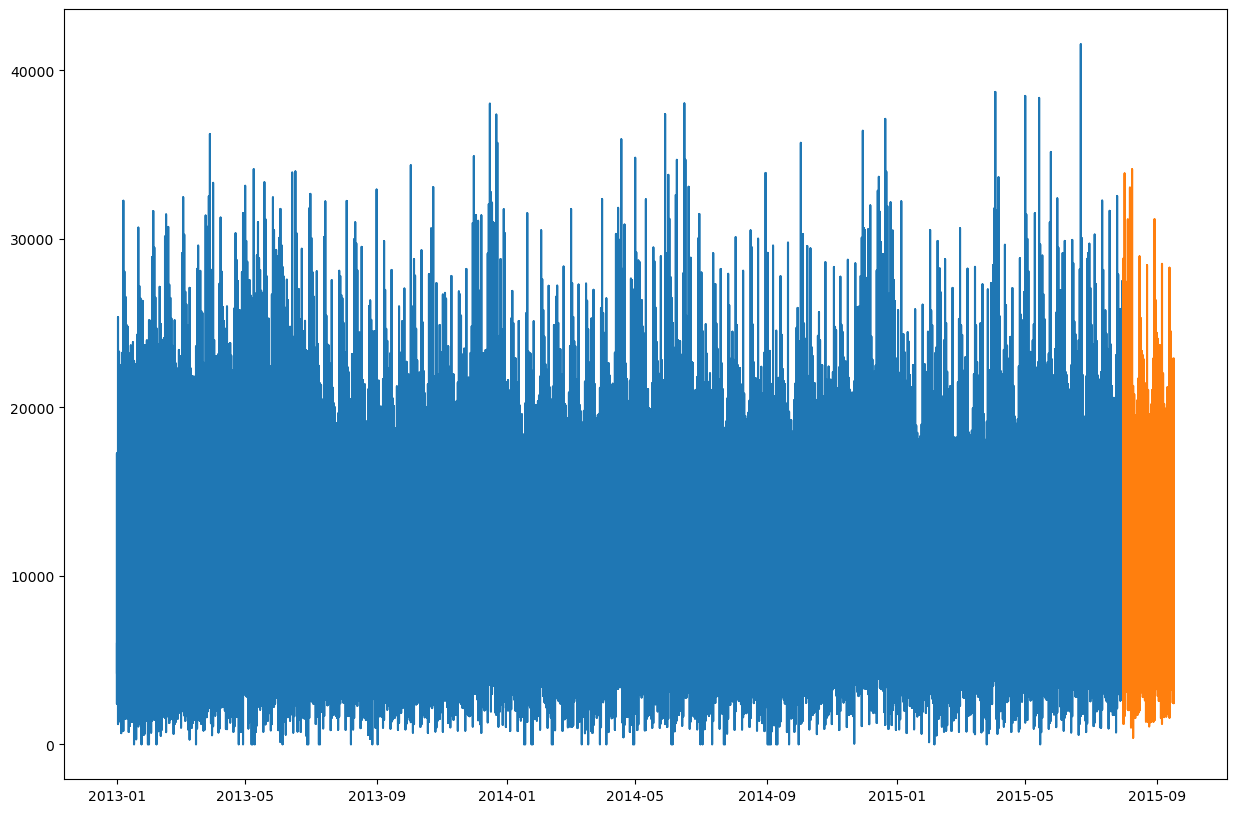

In [139]:
plt.figure(figsize=(15,10))

plt.plot(all_time.index, all_time['Sales'])
plt.plot(all_time.index, all_time['Predicted Sales'])



In [141]:
all_time_sales = all_time.drop(columns = ['Store', 
                                        'DayOfWeek', 
                                        'Promo', 
                                        'StateHoliday', 
                                        'SchoolHoliday',
                                        'StoreType',
                                        'Assortment',
                                        'CompetitionDistance',
                                        'Year', 'Month', 'Day',
                                        'Promo2'
                           ])

In [142]:
all_time_sales

,Sales,Predicted Sales
Date,,
2015-07-31,5263.0,NaN
2015-07-31,6064.0,NaN
2015-07-31,8314.0,NaN
2015-07-31,13995.0,NaN
2015-07-31,4822.0,NaN
...,...,...
2015-08-01,NaN,2116.598145
2015-08-01,NaN,6697.014648
2015-08-01,NaN,5663.105957


In [152]:
all_time_sales.describe()

,Sales,Predicted Sales
count,844392.000000,35104.000000
mean,6955.514291,6830.222168
std,3104.214680,2626.297607
min,0.000000,388.199097
25%,4859.000000,5089.218262
50%,6369.000000,6397.106445
75%,8360.000000,8048.067383
max,41551.000000,34129.886719


In [143]:
mean_sales = all_time_sales.groupby(all_time_sales.index).mean()
mean_sales

,Sales,Predicted Sales
Date,,
2013-01-01,5719.705882,NaN
2013-01-02,6255.471647,NaN
2013-01-03,5723.913436,NaN
2013-01-04,5991.835740,NaN
2013-01-05,5376.326107,NaN
...,...,...
2015-09-13,NaN,7992.354980
2015-09-14,NaN,9531.231445
2015-09-15,NaN,7790.414551


In [149]:
mean_sales.to_csv('mean_sales.csv')

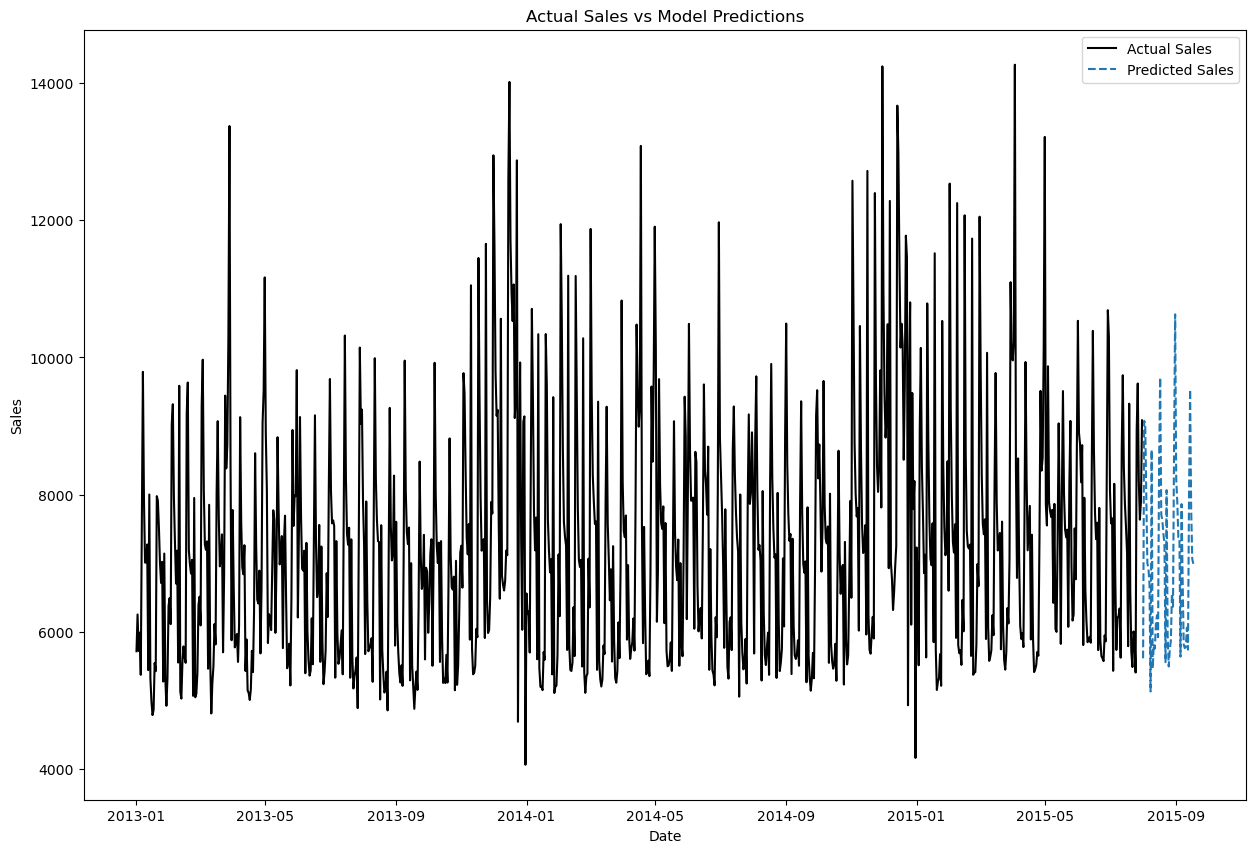

In [144]:
plt.figure(figsize=(15,10))

for column in mean_sales.columns:
    if column != 'Sales':
        plt.plot(mean_sales.index, mean_sales[column], linestyle='--')
    else:
        plt.plot(mean_sales.index, mean_sales[column], linestyle='-', color='black')

plt.legend(['Actual Sales', 'Predicted Sales'])
plt.title('Actual Sales vs Model Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [147]:
snapshot = mean_sales[mean_sales.index > '2015-06-01'].copy()

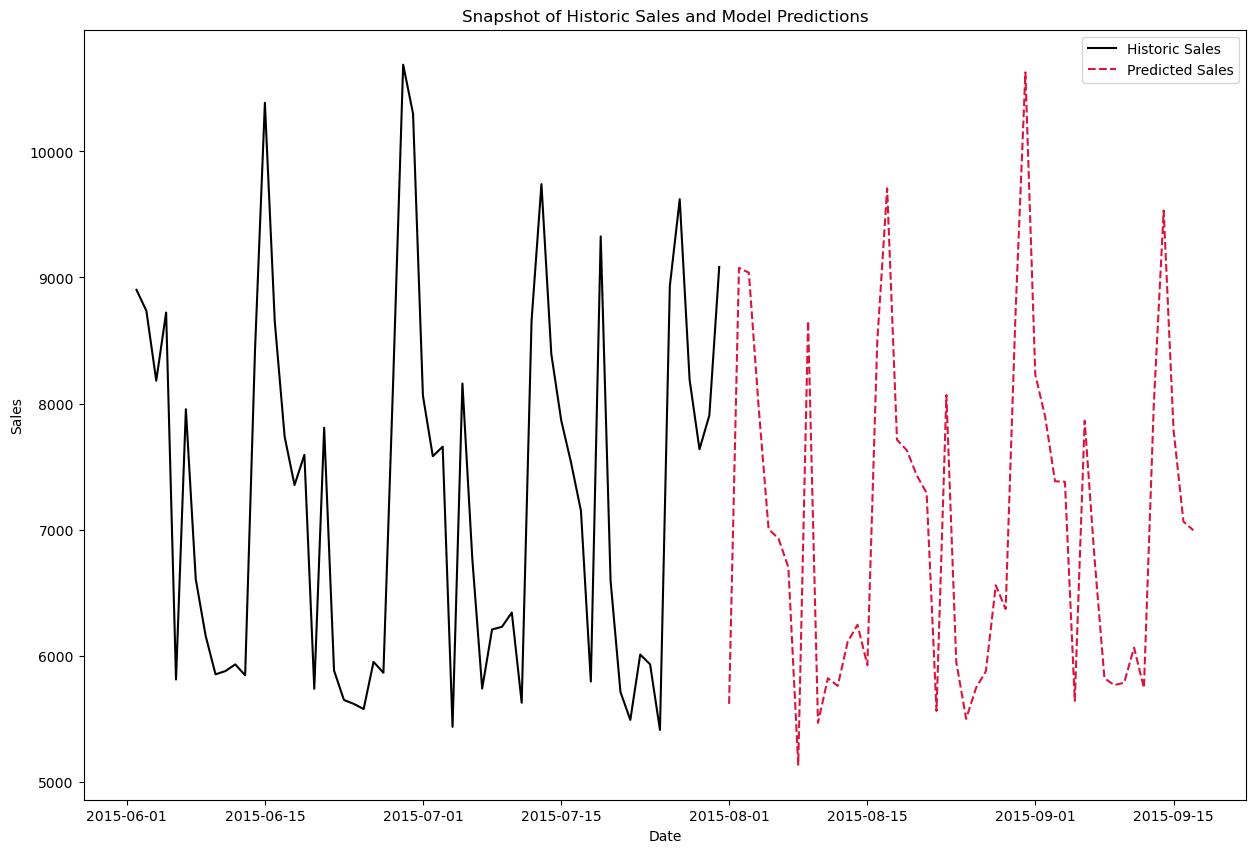

In [155]:
plt.figure(figsize=(15,10))

for column in snapshot.columns:
    if column != 'Sales':
        plt.plot(snapshot.index, snapshot[column], linestyle='--', color='crimson')
    else:
        plt.plot(snapshot.index, snapshot[column], linestyle='-', color='black')

plt.legend(['Historic Sales', 'Predicted Sales'])
plt.title('Snapshot of Historic Sales and Model Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()